In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

f = lambda x, y: x **2 - y ** 2
x = np.random.random_sample(20)
y = np.random.random_sample(20)
z = f(x, y)

x_samples, y_samples = np.meshgrid(x, y)

z_samples = f(x_samples, y_samples)

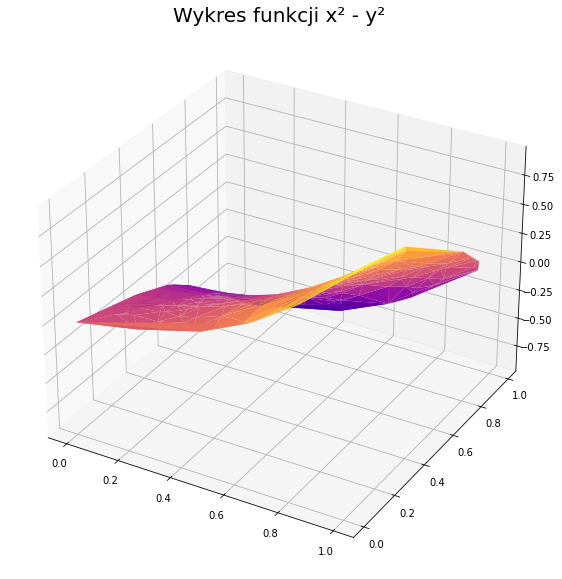

In [2]:
from mpl_toolkits.mplot3d import Axes3D

x_plot = np.random.random_sample(200)
y_plot = np.random.random_sample(200)

x_plot_m, y_plot_m = np.meshgrid(x_plot, y_plot)
z_plot = f(x_plot, y_plot)


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_title('Wykres funkcji x\u00B2 - y\u00B2', fontsize=20)
ax.plot_trisurf(x_plot, y_plot, z_plot, cmap="plasma")

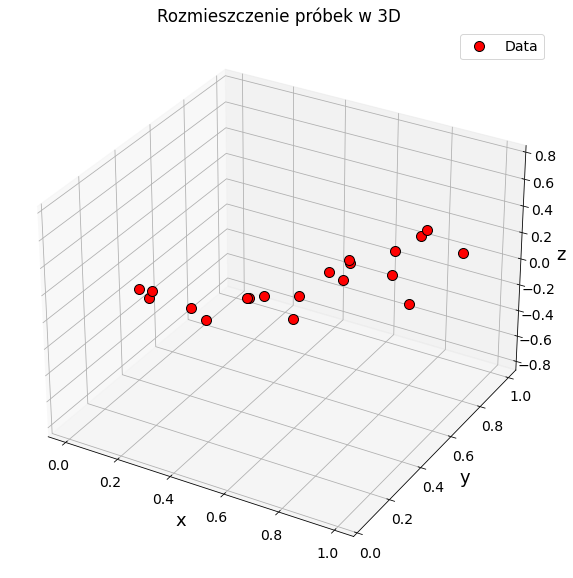

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


params = {'font.size'     : 14,
          'lines.linewidth': 2.,
          'lines.markersize': 10,}
plt.rcParams.update(params)


fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.clf()

ax[0] = plt.axes(projection='3d')

ax[0].plot(x, y, z, "or", label='Data', markeredgecolor='black')
ax[0].set_xlabel('x', fontsize=18)
ax[0].set_ylabel('y', fontsize=18)
ax[0].set_zlabel('z', fontsize=18)
ax[0].set_xticks((np.linspace(0, 1, 6)))
ax[0].set_yticks((np.linspace(0, 1, 6)))
ax[0].set_title("Rozmieszczenie próbek w 3D")



plt.legend()

plt.show()

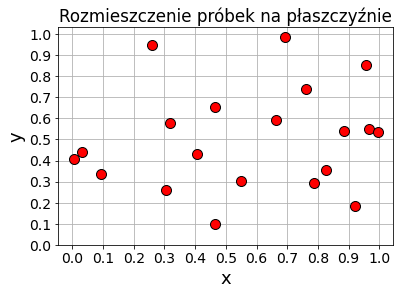

In [4]:


ax[1] = plt.axes()
ax[1].plot(x, y, "or", label='Data', markeredgecolor='black')
ax[1].set_xlabel('x', fontsize=18)
ax[1].set_ylabel('y', fontsize=18)
ax[1].set_xticks((np.linspace(0, 1, 11)))
ax[1].set_yticks((np.linspace(0, 1, 11)))
ax[1].set_title('Rozmieszczenie próbek na płaszczyźnie')


plt.grid(True)
plt.show()

In [5]:
Mx, My = 8, 8
mx_coords = np.linspace(x.min(), x.max(), Mx)
my_coords = np.linspace(y.min(), y.max(), My)
X_resamples, Y_resamples = np.meshgrid(mx_coords, my_coords)

res = 1000
original_x = np.linspace(x.min(), x.max(), res)
original_y = np.linspace(y.min(), y.max(), res)

X, Y = np.meshgrid(original_x, original_y)
Z = f(X, Y)

Funkcja rysująca wykresy

In [6]:
def drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, interpoplation_type='liniowa'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    c = ax[0].contourf(X, Y, Z, 15, cmap=plt.cm.plasma)

    ax[0].set_xlabel("$x$", fontsize=14)
    ax[0].set_ylabel("$y$", fontsize=14)
    ax[0].plot(x, y, 'x', color='black', label='Próbki')
    ax[0].plot(X_resamples, Y_resamples, '.', color='gray', alpha=0.5)
    ax[0].set_title("Oryginalna funkcja x\u00B2 - y\u00B2")
    ax[0].legend(loc='upper left', fontsize=12)

    cb = fig.colorbar(c, ax=ax[0])
    cb.set_label("$z$", fontsize=14)

    c = ax[1].contourf(X_resamples, Y_resamples, Z_resamples, 15, cmap=plt.cm.plasma)

    ax[1].set_xlabel("$x$", fontsize=14)
    ax[1].set_ylabel("$y$", fontsize=14)
    ax[1].set_title(f"Interpolacja {interpoplation_type}")
    
    cb = fig.colorbar(c, ax=ax[1])
    cb.set_label("$z$", fontsize=14)


    plt.show()

Interpolacja liniowa używając pakietu scipy

In [7]:
# !pip install sklearn
# !pip install scipy
from scipy import interpolate

linear_interpolate_obj = interpolate.interp2d(x, y, z_samples, kind='linear')
Z_resamples = linear_interpolate_obj(mx_coords, my_coords)


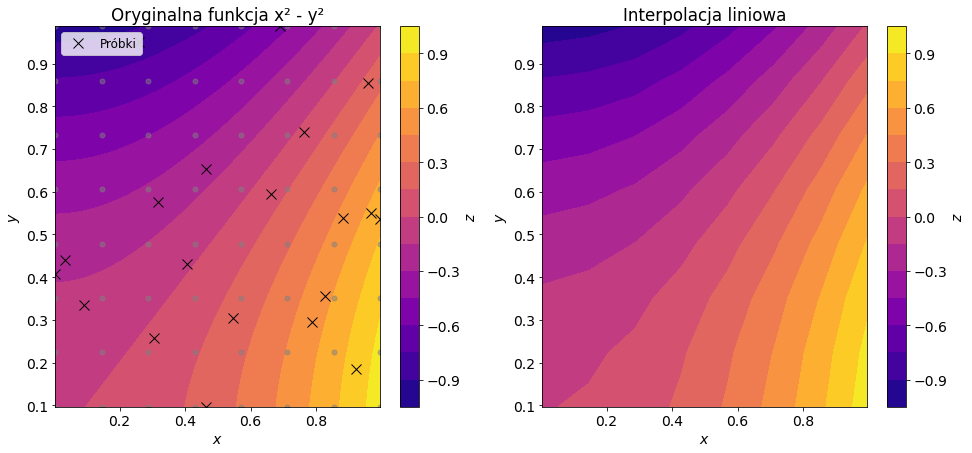

In [8]:
drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples)

Interpolacja kubiczna

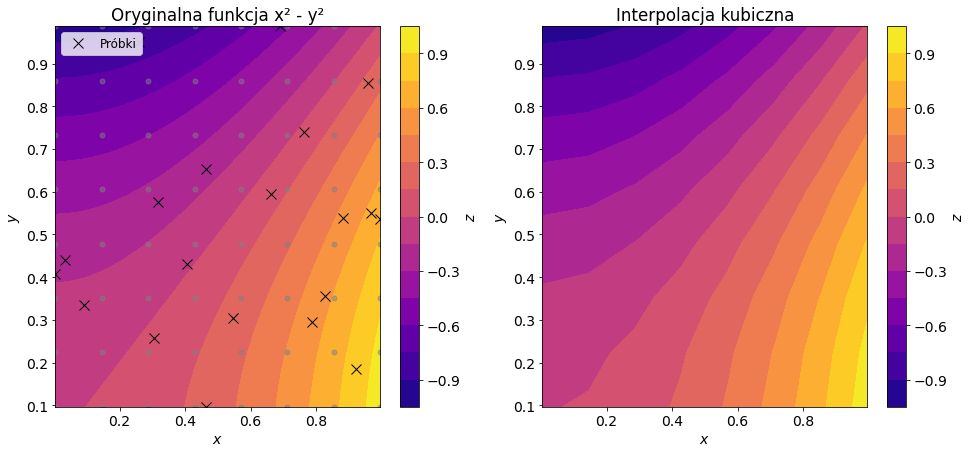

In [9]:

cubic_interpolate_obj = interpolate.interp2d(x, y, z_samples, kind='cubic')
Z_resamples = cubic_interpolate_obj(mx_coords, my_coords)

drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, 'kubiczna')


Interpolacja metodą najbliższego sąsiada

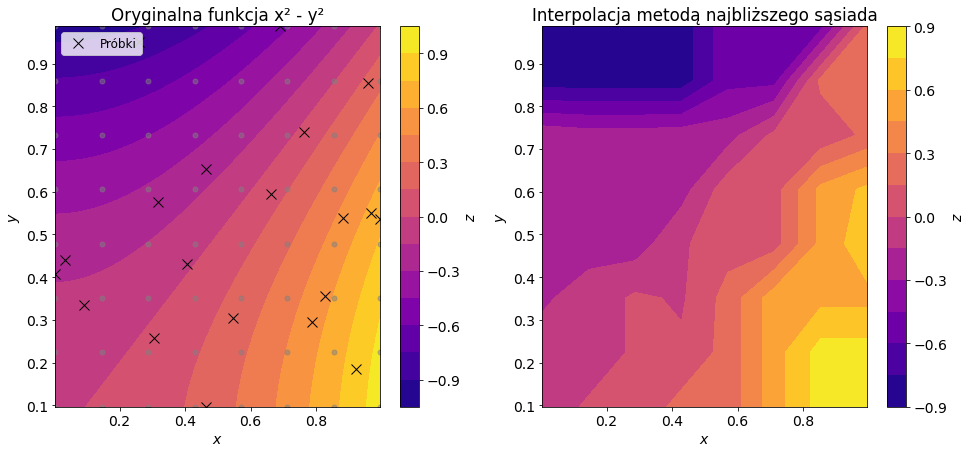

In [10]:
Z_resamples = interpolate.griddata((x, y), z, (X_resamples, Y_resamples), method='nearest')

drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, 'metodą najbliższego sąsiada')

Spróbujmy dla 100 próbek dla metody najbliższego sąsiada

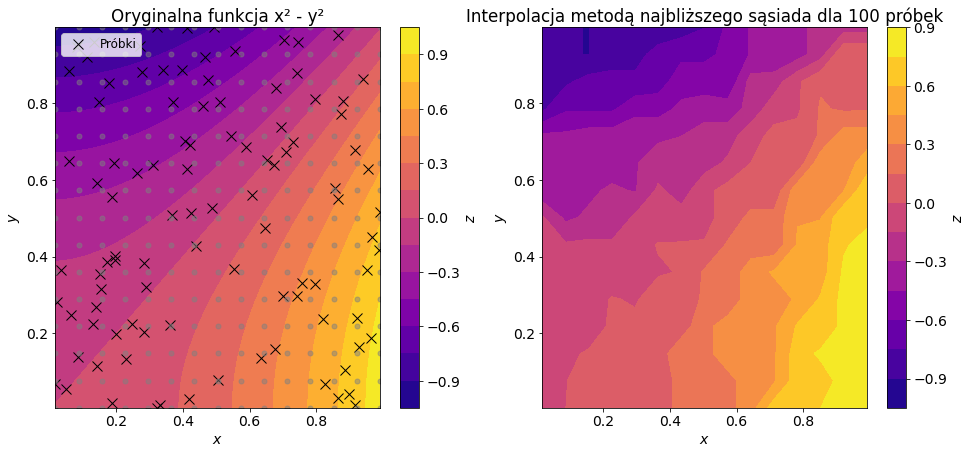

In [11]:
x = np.random.random_sample(100)
y = np.random.random_sample(100)
z = f(x, y)

Mx, My = 15, 15
mx_coords = np.linspace(x.min(), x.max(), Mx)
my_coords = np.linspace(y.min(), y.max(), My)

X_resamples, Y_resamples = np.meshgrid(mx_coords, my_coords)


res, margin = 1000, 0.1
original_x = np.linspace(x.min(), x.max(), res)
original_y = np.linspace(y.min(), y.max(), res)
X, Y = np.meshgrid(original_x, original_y)
Z = f(X, Y)

Z_resamples = interpolate.griddata((x, y), z, (X_resamples, Y_resamples), method='nearest')

drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, 'metodą najbliższego sąsiada dla 100 próbek')